In [64]:
## Dependencies
import spotipy
import requests
import pandas as pd
import seaborn
import tensorflow as tf
from matplotlib import pyplot
from spotipy.oauth2 import SpotifyOAuth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [65]:
dataframes = [
pd.read_csv("Resources/BB100.csv"),
pd.read_csv("Resources/Top100-2022.csv"),
pd.read_csv("Resources/Top100-2021.csv"),
pd.read_csv("Resources/Top100-2020.csv"),
pd.read_csv("Resources/Top100-2019.csv"),
pd.read_csv("Resources/Top100-2018.csv"),
pd.read_csv("Resources/Top100-2017.csv"),
pd.read_csv("Resources/Top100-2016.csv"),
pd.read_csv("Resources/Top100-2015.csv")
]

In [66]:
song_df = pd.concat(dataframes, ignore_index=True)
song_df

,Unnamed: 0,song_id,song_name,album,artist,duration(ms),release_date,acousticness,danceability,energy,...,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
0,0,3k79jB4aGmMDUQzEwa46Rz,vampire,vampire,Olivia Rodrigo,219724,2023-06-30,0.1690,0.511,0.532,...,5,0.3110,-5.745,1,0.0560,137.827,4,0.322,90,1
1,1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Paint The Town Red,Doja Cat,231750,2023-08-04,0.2690,0.868,0.538,...,5,0.0901,-8.603,1,0.1740,99.968,4,0.732,100,1
2,2,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,227195,2023-08-25,0.5540,0.429,0.453,...,0,0.1020,-7.746,1,0.0459,77.639,4,0.155,91,1
3,3,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Gettin' Old,Luke Combs,265493,2023-03-24,0.1860,0.712,0.603,...,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,89,1
4,4,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Lover,Taylor Swift,178426,2019-08-23,0.1170,0.552,0.702,...,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,95,3ieLey98V9mIIh3W9gBlPF,Barcelona,Wanted on Voyage (Expanded Edition),George Ezra,188960,2014-06-30,0.3200,0.629,0.572,...,5,0.1090,-9.332,1,0.0307,93.997,4,0.182,69,0
896,96,023OVLNzXhX0j7CxswUt6D,Cheerleader - Felix Jaehn Remix Radio Edit,Me 4 U,OMI,180560,2015-10-16,0.1410,0.780,0.680,...,4,0.1380,-6.081,1,0.0305,118.026,4,0.594,69,0
897,97,0hNduWmlWmEmuwEFcYvRu1,Sunset Lover,Sunset Lover,Petit Biscuit,237792,2015,0.7290,0.783,0.467,...,6,0.1090,-9.474,1,0.0503,90.838,4,0.236,68,0
898,98,1BZG99C7Co1r6QUC3zaS59,Same Old Love,Revival (Deluxe),Selena Gomez,229080,2015-10-09,0.0223,0.672,0.593,...,11,0.2140,-4.010,0,0.0304,98.020,4,0.438,68,0


In [67]:
copy_song_df = song_df.drop(columns=song_df.columns[:5])
copy_df_cor = copy_song_df.corr()
copy_df_cor

C:\Users\Jesse\AppData\Local\Temp\ipykernel_19904\1688671060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df_cor = copy_song_df.corr()


,duration(ms),acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
duration(ms),1.000000,0.047956,-0.119540,-0.060647,0.078346,-0.037924,-0.023676,-0.119210,0.029947,-0.059172,-0.037797,-0.019896,-0.195526,0.058894,0.003079
acousticness,0.047956,1.000000,-0.210421,-0.578260,0.068392,-0.003257,-0.067561,-0.445663,0.084470,-0.063954,-0.136935,-0.066386,-0.204776,0.058782,0.118552
danceability,-0.119540,-0.210421,1.000000,0.068727,-0.004298,0.075441,-0.053280,0.081694,-0.116693,0.211788,-0.124616,0.094409,0.387030,-0.028956,-0.033809
energy,-0.060647,-0.578260,0.068727,1.000000,-0.076867,0.023933,0.128957,0.713905,-0.097249,-0.028066,0.108920,0.084145,0.435234,-0.040141,-0.064206
insturmentalness,0.078346,0.068392,-0.004298,-0.076867,1.000000,0.027231,-0.048760,-0.187058,-0.036445,-0.019197,-0.001820,0.014711,-0.106032,0.032005,0.001323
key,-0.037924,-0.003257,0.075441,0.023933,0.027231,1.000000,-0.009769,-0.006140,-0.160650,0.055745,-0.019414,-0.004786,0.040137,-0.052972,-0.002514
liveness,-0.023676,-0.067561,-0.053280,0.128957,-0.048760,-0.009769,1.000000,0.057160,-0.069678,-0.010974,0.010352,-0.018970,0.050073,-0.022354,-0.014914
loudness,-0.119210,-0.445663,0.081694,0.713905,-0.187058,-0.006140,0.057160,1.000000,-0.036592,-0.109644,0.059066,0.024997,0.379309,-0.026677,-0.034541
mode,0.029947,0.084470,-0.116693,-0.097249,-0.036445,-0.160650,-0.069678,-0.036592,1.000000,-0.114055,0.007313,-0.017371,-0.024739,0.046111,0.050664
spechiness,-0.059172,-0.063954,0.211788,-0.028066,-0.019197,0.055745,-0.010974,-0.109644,-0.114055,1.000000,0.147826,0.090322,0.066857,-0.017880,-0.048361


<Axes: >

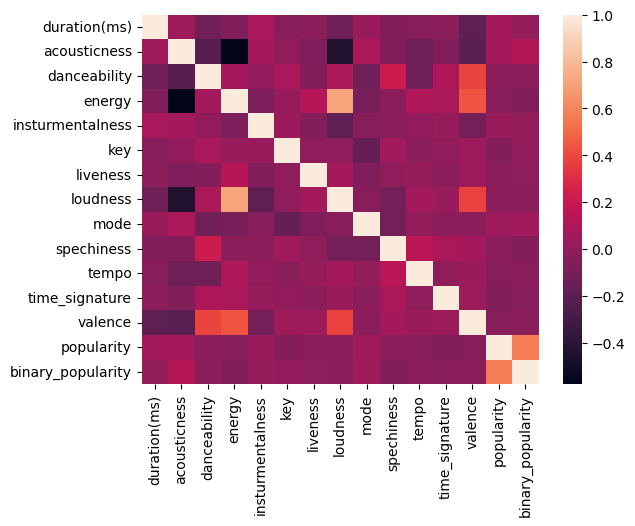

In [68]:
seaborn.heatmap(copy_df_cor)

In [69]:
X = copy_song_df.copy()
X.drop(["popularity", "binary_popularity", "release_date"], axis=1, inplace=True)
X.head()

,duration(ms),acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence
0,219724,0.169,0.511,0.532,0.000000,5,0.3110,-5.745,1,0.0560,137.827,4,0.322
1,231750,0.269,0.868,0.538,0.000003,5,0.0901,-8.603,1,0.1740,99.968,4,0.732
2,227195,0.554,0.429,0.453,0.000002,0,0.1020,-7.746,1,0.0459,77.639,4,0.155
3,265493,0.186,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,4,0.670
4,178426,0.117,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564


In [70]:
y = copy_song_df["binary_popularity"].ravel()
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [71]:
copy_song_df

,duration(ms),release_date,acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
0,219724,2023-06-30,0.1690,0.511,0.532,0.000000,5,0.3110,-5.745,1,0.0560,137.827,4,0.322,90,1
1,231750,2023-08-04,0.2690,0.868,0.538,0.000003,5,0.0901,-8.603,1,0.1740,99.968,4,0.732,100,1
2,227195,2023-08-25,0.5540,0.429,0.453,0.000002,0,0.1020,-7.746,1,0.0459,77.639,4,0.155,91,1
3,265493,2023-03-24,0.1860,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,89,1
4,178426,2019-08-23,0.1170,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,188960,2014-06-30,0.3200,0.629,0.572,0.000853,5,0.1090,-9.332,1,0.0307,93.997,4,0.182,69,0
896,180560,2015-10-16,0.1410,0.780,0.680,0.000012,4,0.1380,-6.081,1,0.0305,118.026,4,0.594,69,0
897,237792,2015,0.7290,0.783,0.467,0.809000,6,0.1090,-9.474,1,0.0503,90.838,4,0.236,68,0
898,229080,2015-10-09,0.0223,0.672,0.593,0.000000,11,0.2140,-4.010,0,0.0304,98.020,4,0.438,68,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=0)

rf_model = rf_model.fit(X_train_scaled, y_train)

In [75]:
predictions = rf_model.predict(X_test_scaled)

In [76]:
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [85]:
print("--------Confusion Matrix---------")
display(cm_df)
print(f'Accuracy Score {round(acc_score, 2)}')
print("---------------------------------")
print("Classfication Report")
print(classification_report(y_test, predictions))

--------Confusion Matrix---------


,Predicted 0,Predicted 1
Actual 0,23,66
Actual 1,18,118


Accuracy Score 0.63
---------------------------------
Classfication Report
              precision    recall  f1-score   support

           0       0.56      0.26      0.35        89
           1       0.64      0.87      0.74       136

    accuracy                           0.63       225
   macro avg       0.60      0.56      0.55       225
weighted avg       0.61      0.63      0.59       225

